In [1]:
from PIL import Image

# Open the image
img = Image.open('D:/SML_Train/Train_0.jpg')

# Get the dimensions of the image
width, height = img.size
newsize=(100,100)
im1 = img.resize(newsize)
print(im1.size)

(100, 100)


In [30]:
import numpy as np
import os
from tensorflow.keras.applications import MobileNetV2
from keras.utils import to_categorical
import os
import glob
import zipfile
import seaborn as sb
import numpy as np # linear algebra
import pandas as pd # data processing 
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.metrics import confusion_matrix,classification_report
from keras.optimizers import Adam
import os
import numpy as np
import pandas as pd
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf      
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Model 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, AveragePooling2D, Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import Callback,ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
IMAGE_SIZE = (100,100)
BATCH_SIZE = 128

In [4]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def load_data():
#     """
#         Load the data:
#             - 14,034 images to train the network.
#             - 3,000 images to evaluate how accurately the network learned to classify images.
#     """
    
#     dataset = 'D:/SML_Train/'
#     labels_df = pd.read_csv('C:/Users/HP/Downloads/SML_Train.csv')
#     labels_df['category'] = labels_df['category'].astype(str)
#     class_names = sorted(list(set(labels_df['category'])))
#     class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
    
#     train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )
    
#     train_generator = train_datagen.flow_from_dataframe(
#         dataframe=labels_df,
#         directory=dataset,
#         x_col='id',
#         y_col='category',
#         target_size=IMAGE_SIZE,
#         batch_size=BATCH_SIZE,
#         class_mode='categorical',
#         shuffle=True,
#         seed=42
#     )
    
#     return train_generator, class_names_label



In [5]:
# (train_images, train_labels) = load_data()

## Loading the Dataset and pre-processing

In [6]:
# Load the CSV file into a Pandas dataframe
labels_df = pd.read_csv('C:/Users/HP/Downloads/SML_Train.csv')

# Create empty lists to store the images and labels
images = []
labels = []

# Loop through each row in the dataframe
for index, row in labels_df.iterrows():
    # Load the image and convert it to a NumPy array
    image = Image.open(f'D:/SML_Train/{row["id"]}')
    newsize=(100,100)
    image = image.resize(newsize)
    image_array = np.array(image)
    # Append the image and label to their respective lists
    images.append(image_array)
    labels.append(row['category'])

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    dataset = 'D:/SML_Train/'
    labels_df = pd.read_csv('C:/Users/HP/Downloads/SML_Train.csv')
    class_names = sorted(list(set(labels_df['category'])))
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
    
    images = []
    labels = []
        
    print("Loading {}".format(dataset))
        
    # Iterate through each image in our folder
    for file in tqdm(os.listdir(dataset)):
                
        # Get the path name of the image
        img_path = os.path.join(dataset, file)
                
        # Open and resize the img
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
                
        # Get the label of the image
        label = labels_df.loc[labels_df['id'] == file, 'category'].iloc[0]
        label = class_names_label[label]
                
        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
                
    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')   
    
    return images, labels


In [7]:
(train_images, train_labels) = load_data()

Loading D:/SML_Train/


100%|███████████████████████████████████████████████████████████████████████████| 16000/16000 [01:02<00:00, 255.59it/s]


In [10]:
#train_images, train_labels = shuffle(train_images, train_labels, random_state=50)

In [8]:
n_train = train_labels.shape[0]
print ("Number of training examples: {}".format(n_train))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 16000
Each image is of size: (100, 100)


In [9]:
train_images = train_images / 255.0 

## Model 1 - CNN

In [16]:
train_labels_new = to_categorical(train_labels)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(25, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
history = model.fit(train_images, train_labels_new, batch_size=128, epochs=25, validation_split = 0.2)

Epoch 1/25
100/100 [==============================] - 86s 835ms/step - loss: 2.8938 - accuracy: 0.1795 - recall: 0.0172 - precision: 0.7143 - val_loss: 2.6056 - val_accuracy: 0.2688 - val_recall: 0.0550 - val_precision: 0.7068
Epoch 2/25
100/100 [==============================] - 82s 821ms/step - loss: 2.3521 - accuracy: 0.3408 - recall: 0.1029 - precision: 0.7264 - val_loss: 2.3988 - val_accuracy: 0.3331 - val_recall: 0.1106 - val_precision: 0.7052
Epoch 3/25
100/100 [==============================] - 82s 825ms/step - loss: 2.0601 - accuracy: 0.4148 - recall: 0.1789 - precision: 0.7626 - val_loss: 2.3614 - val_accuracy: 0.3512 - val_recall: 0.1391 - val_precision: 0.6773
Epoch 4/25
100/100 [==============================] - 71s 707ms/step - loss: 1.8037 - accuracy: 0.4877 - recall: 0.2527 - precision: 0.7932 - val_loss: 2.2638 - val_accuracy: 0.3837 - val_recall: 0.1891 - val_precision: 0.6656
Epoch 5/25
100/100 [==============================] - 163s 2s/step - loss: 1.5284 - accuracy

In [17]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

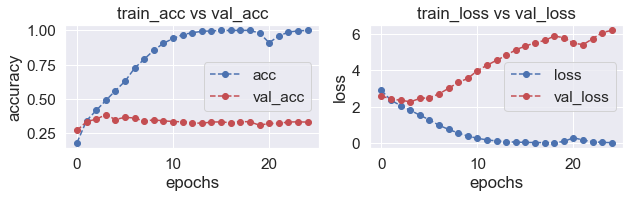

In [18]:
plot_accuracy_loss(history)

In [19]:
model.save('cnn.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# # load the model
# model = load_model('my_model.h5')

In [22]:
# Define the path to the test images
test_path = 'D:/sml_kaggle2/SML_Test/'

# Get a list of all image file names in the directory
image_files = os.listdir(test_path)

# Sort the list of image file names in ascending order
image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# Load the test images into a NumPy array
test_images = []
for file in image_files:
    image = Image.open(os.path.join(test_path, file))
    newsize=(100,100)
    image = image.resize(newsize)
    image_array = np.array(image)
    test_images.append(image_array)
test_images = np.array(test_images)

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Predict the labels of the test images using the trained model
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Create DataFrame with image ids and predicted labels
image_ids = [file for file in image_files]
results_df = pd.DataFrame({'image_id': image_ids, 'label': pred_labels})

# Save results to CSV file
results_df.to_csv('mt21119_CNN.csv', index=False)



47/47 [==============================] - 1s 29ms/step


In [9]:
# # Define the path to the test images
# test_path = 'D:/sml_kaggle2/SML_Test/'

# # Get a list of all image file names in the directory
# image_files = os.listdir(test_path)

# # Sort the list of image file names in ascending order
# image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# # Load the test images into a NumPy array
# test_images = []
# for file in image_files:
#     image = Image.open(os.path.join(test_path, file))
#     image_array = np.array(image)
#     test_images.append(image_array)
# test_images = np.array(test_images)

# # Normalize the pixel values to be between 0 and 1
# test_images = test_images / 255.0


## Model 2 VGG16

In [23]:
model = VGG16(weights='imagenet', include_top=False)
train_features = model.predict(train_images)
test_features = model.predict(test_images)


47/47 [==============================] - 42s 887ms/step


In [24]:
n_train, x, y, z = train_features.shape
numFeatures = x * y * z
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
X = train_features.reshape((n_train, x*y*z))
pca.fit(X)
C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

In [25]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(25, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adagrad', loss = 'categorical_crossentropy', metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

history2 = model2.fit(train_features,train_labels_new,epochs=25)

Epoch 1/25
500/500 [==============================] - 2s 2ms/step - loss: 3.0158 - accuracy: 0.1542 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00
Epoch 2/25
500/500 [==============================] - 1s 2ms/step - loss: 2.6820 - accuracy: 0.2939 - recall_1: 0.0031 - precision_1: 1.0000
Epoch 3/25
500/500 [==============================] - 1s 2ms/step - loss: 2.4639 - accuracy: 0.3539 - recall_1: 0.0222 - precision_1: 0.9861
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 2.2980 - accuracy: 0.3929 - recall_1: 0.0456 - precision_1: 0.9720
Epoch 5/25
500/500 [==============================] - 1s 2ms/step - loss: 2.1814 - accuracy: 0.4181 - recall_1: 0.0680 - precision_1: 0.9544
Epoch 6/25
500/500 [==============================] - 1s 2ms/step - loss: 2.0958 - accuracy: 0.4394 - recall_1: 0.0923 - precision_1: 0.9426
Epoch 7/25
500/500 [==============================] - 1s 2ms/step - loss: 2.0290 - accuracy: 0.4543 - recall_1: 0.1115 - precision_1: 0.9326
Epoch

In [26]:
model.save('D:/vgg16.h5')

In [28]:
# # Define the path to the test images
# test_path = 'D:/sml_kaggle2/SML_Test/'

# # Get a list of all image file names in the directory
# image_files = os.listdir(test_path)

# # Sort the list of image file names in ascending order
# image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# # Load the test images into a NumPy array
# test_images = []
# for file in image_files:
#     image = Image.open(os.path.join(test_path, file))
#     newsize=(100,100)
#     image = image.resize(newsize)
#     image_array = np.array(image)
#     test_images.append(image_array)
# test_images = np.array(test_images)

# # Normalize the pixel values to be between 0 and 1
# test_images = test_images / 255.0

# # Predict the labels of the test images using the trained model
# predictions = model2.predict(test_images)
# pred_labels = np.argmax(predictions, axis=1)

# # Create DataFrame with image ids and predicted labels
# image_ids = [file for file in image_files]
# results_df = pd.DataFrame({'image_id': image_ids, 'label': pred_labels})

# # Save results to CSV file
# #results_df.to_csv('mt21119_CNN.csv', index=False)

## Model 3 VGG19

In [35]:
vgg19_model = VGG19(weights='imagenet',include_top=False)
x=vgg19_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(25, activation='softmax')(x) #final layer with softmax activation

newModel=Model(inputs=vgg19_model.input,outputs=preds)
for layer in newModel.layers[:-5]:
    layer.trainable=False
    
newModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
history = newModel.fit(train_images,train_labels_new,epochs=25)

Epoch 1/25
500/500 [==============================] - 556s 1s/step - loss: 2.2023 - accuracy: 0.3568 - recall_4: 0.1598 - precision_4: 0.7144
Epoch 2/25
500/500 [==============================] - 568s 1s/step - loss: 1.7931 - accuracy: 0.4647 - recall_4: 0.2862 - precision_4: 0.7433
Epoch 3/25
500/500 [==============================] - 557s 1s/step - loss: 1.6563 - accuracy: 0.5081 - recall_4: 0.3386 - precision_4: 0.7603
Epoch 4/25
500/500 [==============================] - 531s 1s/step - loss: 1.5495 - accuracy: 0.5357 - recall_4: 0.3766 - precision_4: 0.7683
Epoch 5/25
500/500 [==============================] - 541s 1s/step - loss: 1.4514 - accuracy: 0.5641 - recall_4: 0.4155 - precision_4: 0.7808
Epoch 6/25
500/500 [==============================] - 526s 1s/step - loss: 1.3613 - accuracy: 0.5888 - recall_4: 0.4446 - precision_4: 0.7921
Epoch 7/25
500/500 [==============================] - 501s 1s/step - loss: 1.2650 - accuracy: 0.6165 - recall_4: 0.4816 - precision_4: 0.8041
Epoch 

In [36]:
newModel.save('D:/vgg19/.h5')

In [37]:
# Define the path to the test images
test_path = 'D:/sml_kaggle2/SML_Test/'

# Get a list of all image file names in the directory
image_files = os.listdir(test_path)

# Sort the list of image file names in ascending order
image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# Load the test images into a NumPy array
test_images = []
for file in image_files:
    image = Image.open(os.path.join(test_path, file))
    image_array = np.array(image)
    test_images.append(image_array)
test_images = np.array(test_images)

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Predict the labels of the test images using the trained model
predictions = newModel.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Create DataFrame with image ids and predicted labels
image_ids = [file for file in image_files]
results_df = pd.DataFrame({'id': image_ids, 'category': pred_labels})

# Save results to CSV file
results_df.to_csv('D:/vgg19.csv', index=False)

47/47 [==============================] - 23s 491ms/step


## Model 4 ResNet50

In [39]:
#build the Resnet model 
resnet = ResNet50(weights='imagenet',
                      input_shape= (100,100,3),
                      include_top= False)  


#show how manay layers in the Resnet Network
layers = resnet.layers

# early stopping 
callbacks = EarlyStopping(patience = 3, monitor='val_acc')
                        
# let's train our Model 
inputs = resnet.input
# add an average pooling layer
x = resnet.output
x = GlobalAveragePooling2D()(x)
#first dense layer
x = Dense(512, activation='relu')(x)
#dropout 
x = Dropout(0.5)(x)
# output layer
outputs = Dense(25, activation ='softmax')(x)
# this is the model we will train
model = Model(inputs=inputs, outputs=outputs)

# freeze all convolutional Resnet layers
for layer in layers:
    layer.trainable = False
# compile the model 
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
# train the model on the new data for a few epochs
history = model.fit(train_images,train_labels_new,epochs= 25,
    callbacks = [callbacks])

Epoch 1/25
500/500 [==============================] - 258s 502ms/step - loss: 3.2144 - accuracy: 0.0584 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 2/25
500/500 [==============================] - 254s 508ms/step - loss: 3.1660 - accuracy: 0.0634 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 3/25
500/500 [==============================] - 255s 511ms/step - loss: 3.1464 - accuracy: 0.0677 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 4/25
500/500 [==============================] - 251s 502ms/step - loss: 3.1320 - accuracy: 0.0709 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 5/25
500/500 [==============================] - 247s 494ms/step - loss: 3.1167 - accuracy: 0.0779 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 6/25
500/500 [==============================] - 239s 479ms/step - loss: 3.1117 - accuracy: 0.0790 - recall_5: 0.0000e+00 - precision_5: 0.0000e+00
Epoch 7/25
500/500 [==============================] - 239s 477ms/step - loss: 3.11

500/500 [==============================] - 218s 436ms/step - loss: 3.0877 - accuracy: 0.0920 - recall_5: 6.2500e-04 - precision_5: 0.4167
Epoch 21/25
500/500 [==============================] - 224s 448ms/step - loss: 3.0882 - accuracy: 0.0938 - recall_5: 4.3750e-04 - precision_5: 0.6364
Epoch 22/25
500/500 [==============================] - 221s 441ms/step - loss: 3.0871 - accuracy: 0.0927 - recall_5: 0.0015 - precision_5: 0.6316
Epoch 23/25
500/500 [==============================] - 221s 442ms/step - loss: 3.0875 - accuracy: 0.0926 - recall_5: 9.3750e-04 - precision_5: 0.6250
Epoch 24/25
500/500 [==============================] - 219s 437ms/step - loss: 3.0807 - accuracy: 0.0922 - recall_5: 3.7500e-04 - precision_5: 0.7500
Epoch 25/25
500/500 [==============================] - 218s 435ms/step - loss: 3.0856 - accuracy: 0.0919 - recall_5: 2.5000e-04 - precision_5: 0.3636


In [40]:
model.save('D:/resnet50.h5')

In [9]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing import image
# # load pre-trained InceptionV3
# pre_trained = InceptionV3(weights='imagenet', input_shape=(64,64,3), pooling='avg')
# train_features = pre_trained.predict(train_images)
# test_features = pre_trained.predict(test_images)


## Model 5 Mobilenetv2

In [16]:
from tensorflow.keras.applications import MobileNetV2
from keras.utils import to_categorical

def MobileNetV2_model(learning_rate, input_shape):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=(100,100,3)))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='softmax'))

    return model


one_hot_label = to_categorical(train_labels)

bs = 32
lr = 0.0001
shape  =(64,64, 3)
size = (128, 128)
model = MobileNetV2_model(lr,shape)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()], optimizer="adam")
print("[INFO] training ...")
history = model.fit(train_images,one_hot_label,epochs=25)

[INFO] training ...
Epoch 1/25
500/500 [==============================] - 92s 176ms/step - loss: 2.7529 - accuracy: 0.2450 - recall_3: 0.1299 - precision_3: 0.7700
Epoch 2/25
500/500 [==============================] - 89s 178ms/step - loss: 2.2059 - accuracy: 0.3950 - recall_3: 0.2692 - precision_3: 0.8179
Epoch 3/25
500/500 [==============================] - 89s 178ms/step - loss: 1.9151 - accuracy: 0.4692 - recall_3: 0.3446 - precision_3: 0.8409
Epoch 4/25
500/500 [==============================] - 92s 184ms/step - loss: 1.6859 - accuracy: 0.5292 - recall_3: 0.3992 - precision_3: 0.8544
Epoch 5/25
500/500 [==============================] - 90s 181ms/step - loss: 1.5281 - accuracy: 0.5675 - recall_3: 0.4420 - precision_3: 0.8604
Epoch 6/25
500/500 [==============================] - 91s 183ms/step - loss: 1.3867 - accuracy: 0.6108 - recall_3: 0.4883 - precision_3: 0.8721
Epoch 7/25
500/500 [==============================] - 88s 176ms/step - loss: 1.2755 - accuracy: 0.6411 - recall_3: 0

In [ ]:
#model.save('cnn.h5')

In [18]:
# Define the path to the test images
test_path = 'D:/sml_kaggle2/SML_Test/'

# Get a list of all image file names in the directory
image_files = os.listdir(test_path)

# Sort the list of image file names in ascending order
image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# Load the test images into a NumPy array
test_images = []
for file in image_files:
    image = Image.open(os.path.join(test_path, file))
    newsize=(100,100)
    image = image.resize(newsize)
    image_array = np.array(image)
    test_images.append(image_array)
test_images = np.array(test_images)

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Predict the labels of the test images using the trained model
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Create DataFrame with image ids and predicted labels
image_ids = [file for file in image_files]
results_df = pd.DataFrame({'id': image_ids, 'category': pred_labels})

# Save results to CSV file
results_df.to_csv('D:/mt21119_mobilenet.csv', index=False)

47/47 [==============================] - 7s 118ms/step


In [44]:
from tensorflow.keras.applications import MobileNetV2
from keras.utils import to_categorical

def MobileNetV2_model(learning_rate, input_shape):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=(100,100,3)))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='softmax'))

    return model


one_hot_label = to_categorical(train_labels)

bs = 32
lr = 0.001
shape  =(64,64, 3)
size = (128, 128)
model = MobileNetV2_model(lr,shape)
model.compile(loss= "categorical_crossentropy", metrics=["accuracy",tf.keras.metrics.Recall(),tf.keras.metrics.Precision()], optimizer="adam")
print("[INFO] training ...")
history = model.fit(train_images,one_hot_label,epochs=25)

[INFO] training ...
Epoch 1/25
500/500 [==============================] - 74s 143ms/step - loss: 2.6807 - accuracy: 0.2494 - recall_7: 0.1449 - precision_7: 0.7722
Epoch 2/25
500/500 [==============================] - 73s 145ms/step - loss: 2.1488 - accuracy: 0.4059 - recall_7: 0.2860 - precision_7: 0.8302
Epoch 3/25
500/500 [==============================] - 73s 146ms/step - loss: 1.8501 - accuracy: 0.4867 - recall_7: 0.3531 - precision_7: 0.8320
Epoch 4/25
500/500 [==============================] - 73s 146ms/step - loss: 1.6580 - accuracy: 0.5433 - recall_7: 0.4054 - precision_7: 0.8470
Epoch 5/25
500/500 [==============================] - 73s 147ms/step - loss: 1.4780 - accuracy: 0.5834 - recall_7: 0.4532 - precision_7: 0.8492
Epoch 6/25
500/500 [==============================] - 74s 147ms/step - loss: 1.3228 - accuracy: 0.6271 - recall_7: 0.4991 - precision_7: 0.8668
Epoch 7/25
500/500 [==============================] - 73s 147ms/step - loss: 1.2267 - accuracy: 0.6513 - recall_7: 0

In [42]:
model.save('D:/mobilenet.h5')

In [45]:
# Define the path to the test images
test_path = 'D:/sml_kaggle2/SML_Test/'

# Get a list of all image file names in the directory
image_files = os.listdir(test_path)

# Sort the list of image file names in ascending order
image_files.sort(key=lambda x: int(x.split('.')[0].split('_')[1]))

# Load the test images into a NumPy array
test_images = []
for file in image_files:
    image = Image.open(os.path.join(test_path, file))
    newsize=(100,100)
    image = image.resize(newsize)
    image_array = np.array(image)
    test_images.append(image_array)
test_images = np.array(test_images)

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Predict the labels of the test images using the trained model
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Create DataFrame with image ids and predicted labels
image_ids = [file for file in image_files]
results_df = pd.DataFrame({'id': image_ids, 'category': pred_labels})

# Save results to CSV file
results_df.to_csv('D:/mt21119_mobilenet2.csv', index=False)

47/47 [==============================] - 9s 164ms/step
